# Applied ML

In [138]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Statistical test library
import scipy.stats as stats

%matplotlib inline

# Data pre-processing

In [139]:
# Load the dataset
original = pd.read_csv("CrowdstormingDataJuly1st.csv", parse_dates=['birthday'], infer_datetime_format=True)

In [140]:
original.describe()

/Applications/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [141]:
# First glimpse at data content
original.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,1983-08-31,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,1982-01-08,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,1992-12-17,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,1993-08-31,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,1991-07-18,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-11-10,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,1986-04-04,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,1984-04-13,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,1987-03-13,180.0,70.0,Right Fullback,1,1,0,0,0


Challenges in dataset:

- Skin ratings don't match -> take average
- Picture was missing -> exclude from training
- No cards drawn in some dyads


Prune dataset where there is no rater information

# Initial cleaning


In [142]:
grouped = original[['refNum', 'games']].groupby(['refNum']).sum()
grouped_df = grouped[grouped['games'] >= 22].reset_index()

In [143]:
referees_df = original[original['refNum'].isin(grouped_df['refNum'].values)]

In [144]:
# Function to round on quater ratings
def round_quarter(x):
    return round(x*4)/4

In [145]:
rater = referees_df.copy()
rater['rater_mean'] = round_quarter(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'].head()

5    0.00
6    0.00
7    1.00
8    0.25
9    0.00
Name: rater_mean, dtype: float64

In [146]:
rater = rater.dropna(subset=['rater_mean'])
rater['rater_mean'].head()

5    0.00
6    0.00
7    1.00
8    0.25
9    0.00
Name: rater_mean, dtype: float64

Get rid of unusable columns

In [147]:
#features = rater.drop(['rater1','rater2', 'rater_mean'], 1)

# Take only the features that describes the player
# Feature 1 contains the short name of the player
# Feature 16 and upwards contains the information about the rater

features = rater[ rater.columns[:16] | ['rater_mean']]
features.head()

,birthday,club,defeats,games,goals,height,leagueCountry,player,playerShort,position,rater_mean,redCards,ties,victories,weight,yellowCards,yellowReds
5,1979-11-08,Fulham FC,1,1,0,182.0,England,Aaron Hughes,aaron-hughes,Center Back,0.00,0,0,0,71.0,0,0
6,1985-11-10,Manchester City,0,1,0,187.0,England,Aleksandar Kolarov,aleksandar-kolarov,Left Fullback,0.00,0,0,1,80.0,0,0
7,1986-04-04,Norwich City,1,1,0,180.0,England,Alexander Tettey,alexander-tettey,Defensive Midfielder,1.00,0,0,0,68.0,0,0
8,1984-04-13,Manchester United,0,1,0,193.0,England,Anders Lindegaard,anders-lindegaard,Goalkeeper,0.25,0,1,0,80.0,0,0
9,1987-03-13,1899 Hoffenheim,0,1,0,180.0,Germany,Andreas Beck,andreas-beck,Right Fullback,0.00,0,0,1,70.0,0,0


Convert string values to floats by LabelEncoder to make them readable by the classifier

In [148]:


# Workaround by removing problematic columns
#features = features.drop('position', axis=1)
#features = features.drop('Alpha_3', axis=1)
#features.head()


## Feature transformation

When we have categorical data, we need to transform them so that they can be taken into account in our model. One way of doing this is to use LabelEncoder and OneHotEncoder from SciKitLearn. 

LabelEncoder converts each category into an integer, so that we don't have to deal with strings. After doing this transformation, we use OneHotEncoder to make a binary feature for each category. This way, we can capture for instance wether a person has played for both Fulham FC and Manchester City. 

In [149]:
# We select those features that contains some categorical value
# At the same time, we fill the NaN-values by '' to avoid problems later on
categorical_features = features[['leagueCountry','position','club']].fillna('Missing')


columns = []
for cat in categorical_features.columns:
    counts = categorical_features[cat].value_counts()
    n_cats = len(counts)
    
    columns += list(counts.keys().values)

    print("%s (%i categories):" % (cat.capitalize(), n_cats))
    print("%s\n" % counts[:10])

Leaguecountry (4 categories):
Germany    36197
England    33738
Spain      29579
France     18065
Name: leagueCountry, dtype: int64

Position (13 categories):
Center Back             19531
Center Forward          15629
Defensive Midfielder    13307
Goalkeeper              10317
Attacking Midfielder    10126
Left Fullback            8465
Right Fullback           8022
Missing                  7933
Left Midfielder          5951
Right Winger             4878
Name: position, dtype: int64

Club (96 categories):
FC Barcelona           2681
Paris Saint-Germain    2668
Manchester City        2618
Bayern München         2609
VfL Wolfsburg          2574
Arsenal FC             2547
Fulham FC              2543
Tottenham Hotspur      2495
Real Madrid            2475
VfB Stuttgart          2378
Name: club, dtype: int64



In [150]:
# Our categorical_features now looks like this:
categorical_features.head()

,leagueCountry,position,club
5,England,Center Back,Fulham FC
6,England,Left Fullback,Manchester City
7,England,Defensive Midfielder,Norwich City
8,England,Goalkeeper,Manchester United
9,Germany,Right Fullback,1899 Hoffenheim


In [151]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Step 1: Transform each category into an integer
## For this, we use LabelEncoder from sklearn

label_encoded = categorical_features.apply(LabelEncoder().fit_transform)
label_encoded.head()

,leagueCountry,position,club
5,0,1,34
6,0,6,48
7,0,4,54
8,0,5,49
9,2,10,2


In [152]:
# Step 2: Transform each integer into a binary feature
## For this, we use OneHotEncoder

one_hot_encoded = OneHotEncoder().fit_transform(label_encoded).toarray()

one_hot_encoded_features = pd.DataFrame(one_hot_encoded, columns=columns)

one_hot_encoded_features.head()



,Germany,England,Spain,France,Center Back,Center Forward,Defensive Midfielder,Goalkeeper,Attacking Midfielder,Left Fullback,...,Liverpool FC (R),Bristol City,Crewe Alexandra,Real Madrid Castilla,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We remove the original categorical features, and attatch the new one_hot_encoded ones :

In [153]:
features_no_categorical = features.drop( categorical_features.columns, axis=1)


In [154]:
features_one_hot_encoded = features_no_categorical.join(one_hot_encoded_features)
features_one_hot_encoded.head()

,birthday,defeats,games,goals,height,player,playerShort,rater_mean,redCards,ties,...,Liverpool FC (R),Bristol City,Crewe Alexandra,Real Madrid Castilla,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona
5,1979-11-08,1,1,0,182.0,Aaron Hughes,aaron-hughes,0.00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1985-11-10,0,1,0,187.0,Aleksandar Kolarov,aleksandar-kolarov,0.00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1986-04-04,1,1,0,180.0,Alexander Tettey,alexander-tettey,1.00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1984-04-13,0,1,0,193.0,Anders Lindegaard,anders-lindegaard,0.25,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1987-03-13,0,1,0,180.0,Andreas Beck,andreas-beck,0.00,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Aggregating over the players:

We now run grouping and aggregation of our dataframe. The aggregation functions used are defined in two dictionarys.
Each element of the dictionarys contains of a column name and an aggregation function, which is applied to our grouped features.

In [176]:
grouped_features = features_one_hot_encoded.groupby(['playerShort', 'birthday', 'height', 'weight'])

one_hot_enc_aggfunc_mapping = {i: max for i in one_hot_encoded_features.columns}
column_aggfunc_mapping = {'rater_mean': max,'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum, 'yellowCards': sum, 'yellowReds': sum, 'redCards': sum}

aggregated_features = grouped_features.agg({**one_hot_enc_aggfunc_mapping, **column_aggfunc_mapping})
aggregated_features = aggregated_features.reset_index().set_index('playerShort')
aggregated_features.head()

,birthday,height,weight,FC Barcelona,Borussia Dortmund,US Boulogne,AS Nancy,Newcastle United,Left Winger,Atlético Madrid,...,ESTAC Troyes,FC Schalke 04,SC Freiburg,Right Fullback,Valenciennes FC,Right Winger,Stade Reims,Millwall FC,Tottenham Hotspur,Center Midfielder
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,1979-11-08,182.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
aaron-hunt,1986-09-04,183.0,73.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
aaron-lennon,1987-04-16,165.0,63.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
aaron-ramsey,1990-12-26,178.0,76.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
abdelhamid-el-kaoutari,1990-03-17,180.0,73.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Prepared dataset for further processing with ML methods

In [180]:
from sklearn import preprocessing


X_lab = aggregated_features.apply(LabelEncoder().fit_transform)

Xy = X_lab

In [181]:
X_train = Xy.drop('rater_mean', axis=1)
Y_train = Xy['rater_mean']
#Y_train = np.asarray(rater['rater_mean'], dtype="|S6")
X_train = X_train.tail(-3)
Y_train = Y_train[3:]
print(type(Y_train))
print(X_train.shape)
print(Y_train.shape)
print('FEATURES')
print(X_train.head(10))
print('LABELS')
print(Y_train)

<class 'pandas.core.series.Series'>
(1560, 124)
(1560,)
FEATURES
                        birthday  height  weight  FC Barcelona  \
playerShort                                                      
aaron-ramsey                1138      17      21             1   
abdelhamid-el-kaoutari      1074      19      18             0   
abdou-traore_2               861      19      19             0   
abdoulaye-diallo_2          1239      28      25             1   
abdoulaye-keita_2           1118      27      28             0   
abdoulwhaid-sissoko         1075      19      13             1   
abdul-rahman-baba           1357      18      15             0   
abdul-razak                 1275      19      23             0   
abel-aguilar                 533      24      23             1   
abelaziz-barrada            1007      24      23             0   

                        Borussia Dortmund  US Boulogne  AS Nancy  \
playerShort                                                        
aaron-

## Machine Learning by RandomForestClassifier

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
rfc = RandomForestClassifier(verbose=1)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)


### Test classifier

In [184]:
# import test data set to test classifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [185]:
rfc.fit(X, y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [186]:
# test prediction
X_pred = [[3, 5, 4, 2], [5, 4, 3, 2]]
rfc.predict(X_pred)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([1, 1])

### Use classifier with live data

In [187]:
# Plug of unplug live data
X = X_train
y = Y_train

In [188]:
rfc.fit(X, y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [189]:
# manual prediction test
#X_pred = features.head(3)
#rfc.predict(X_pred)

## Inspect most relevant features of RandomForest

Feature ranking:
1. feature 0 (0.045417)
2. feature 40 (0.037529)
3. feature 91 (0.036724)
4. feature 72 (0.036180)
5. feature 41 (0.035387)
6. feature 1 (0.034953)
7. feature 61 (0.032481)
8. feature 2 (0.032029)
9. feature 73 (0.030870)
10. feature 88 (0.019498)
11. feature 111 (0.013377)
12. feature 94 (0.011218)
13. feature 47 (0.010338)
14. feature 21 (0.010124)
15. feature 60 (0.009643)
16. feature 13 (0.009604)
17. feature 96 (0.009481)
18. feature 78 (0.009267)
19. feature 100 (0.009252)
20. feature 49 (0.009148)
21. feature 75 (0.009025)
22. feature 6 (0.008922)
23. feature 38 (0.008785)
24. feature 116 (0.008694)
25. feature 36 (0.008658)
26. feature 25 (0.008606)
27. feature 77 (0.008447)
28. feature 113 (0.008382)
29. feature 65 (0.008335)
30. feature 34 (0.008295)
31. feature 103 (0.008261)
32. feature 67 (0.008154)
33. feature 107 (0.008106)
34. feature 10 (0.008079)
35. feature 69 (0.008063)
36. feature 55 (0.008016)
37. feature 79 (0.008000)
38. feature 74 (0.007847)
39

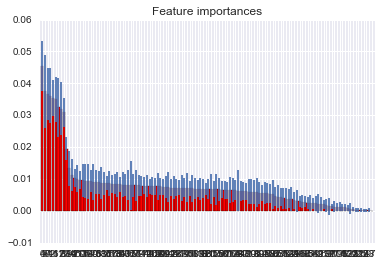

In [190]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Performance assessment through cross-validation

In [191]:
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(scores)
print('Achieved model score: ', np.mean(scores))

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[ 0.39240506  0.43949045  0.40127389  0.30573248  0.39102564  0.33548387
  0.37419355  0.32258065  0.40645161  0.3483871 ]
Achieved model score:  0.37170242938


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Visualize score results as boxplots

{'boxes': [<matplotlib.lines.Line2D at 0x12cb8ac88>],
 'caps': [<matplotlib.lines.Line2D at 0x12cbc1588>,
 'fliers': [<matplotlib.lines.Line2D at 0x12cd5a630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12cb912b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12cc0e4a8>,
  <matplotlib.lines.Line2D at 0x12cc0e198>]}

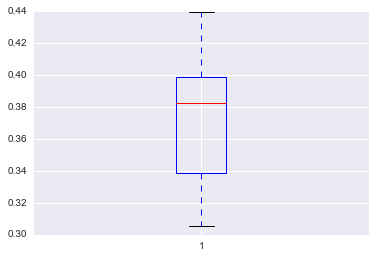

In [193]:
plt.boxplot(scores)

## TODO

- Empty string in column position and Alpha_3 to make them usable for labelencoder
- group-by player to avoid same person being in training and test set
